Lagrangian 2D motion
----------------

The Lagrangian for a particle moving in 2 dimensions is:

$$L(x,y) = \frac{1}{2} m(\dot{x}^2+\dot{y}^2) - V(y)$$

We will define V(y) as follows:
$$V(y) = mgy$$

Our Lagrangian is then:
$$L(x,y) = \frac{1}{2} m(\dot{x}^2+\dot{y}^2) - mgy$$







Useful Partial Derivatives
----------------

Several partial derivatives will be useful, they are listed below:
$$\frac{\partial L}{\partial x} = 0$$   
$$\frac{\partial L}{\partial \dot{x}} = m\dot{x}$$  
$$\frac{\partial L}{\partial y} = -mg$$  
$$\frac{\partial L}{\partial \dot{y}} = m\dot{y}$$  


Euler-Lagrange Equations
----------------

The Euler-Lagrange equations are:
$$ \frac{d}{dt} \frac{\partial L}{\partial \dot{q_i}} - \frac{\partial L}{\partial q_i} = 0$$    

Let's define momentum as:  

$$p_i = \frac{\partial L}{\partial \dot{q_i}}$$

We can rewrite the Euler-Lagrange equations as:
$$\dot{p_i} = \frac{\partial L}{\partial q_i}$$

Substituting our partial derivatives from above, we get:
$$\dot{p_x} = 0$$  
$$p_x = m\dot{x}$$  
$$\dot{p_y} = -mg$$  
$$p_y = m\dot{y}$$  

Python Simulation
----------------

Let's start by dealing with our imports

In [4]:
import numpy
from matplotlib import pyplot
import time, sys
%matplotlib inline




Next we need to set up some variables



In [5]:
#numerical solution to particle motion
#  L = 0.5m(Vx**2+Vy**2)-mgy

nPoints = 100 #number of points to calculate
dt = (0.1) #length of each timestep
#total time span = nPoints * dt
mass = 1
a = -9.8

We will use numpy arrays to hold the values of the particle's momentum and position at every point.  
The arrays will start out filled with zeros, and we will update the values later.  
We will define some additional arrays to hold the analytical solution to particle motion, so that we can compare.

In [6]:
#define arrays to hold things as we calculate them
Py = numpy.zeros(nPoints)
Px = numpy.zeros(nPoints)
Y = numpy.zeros(nPoints)
X = numpy.zeros(nPoints)
Yanalytical = numpy.zeros(nPoints)
Xanalytical = numpy.zeros(nPoints)

#define initial conditions for numerical solution, these are arbitrary and can be changed
Py[0] = 50
Px[0] = 5
Y[0] = 0
X[0] = 0

#analytical initial conditions so we can compare with numerical solution
Yanalytical[0] = Y[0] 
Xanalytical[0] = X[0]
Vyi = Py[0] / mass
Vxi = Px[0] / mass

We need to define some equations to update the values of the particle's position and momentum at each timestep.


In [7]:
#update equations

#iterate over all the points we want to calculate at
for t in range(1,nPoints):
    #update equations for numerical solution
    Py[t] = mass * a * dt + Py[t-1]
    Px[t] = Px[t-1]
    Vy = Py[t] / mass
    Vx = Px[t] / mass
    Y[t] = Y[t-1] + Vy*dt
    X[t] = X[t-1] + Vx * dt
    #update analytical solution
    Yanalytical[t] = Yanalytical[0] + Vyi*dt*t + a*(dt*t)**2 / 2
    Xanalytical[t] = Xanalytical[0] + Vxi*dt*t

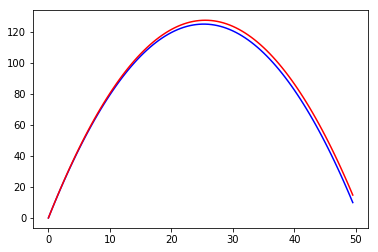

In [8]:
pyplot.plot(X,Y,'b-', Xanalytical, Yanalytical, 'r-') ##Plot the results


In [20]:
# 1D Mass on a Spring
# L = 0.5mVx**2 - 0.5kx**2

nPoints = 100 #number of points to calculate
dt = (0.1) #length of each timestep
#total time span = nPoints * dt
mass = 1
k = 1
w = (k/mass)**0.5

In [25]:
#define arrays to hold things as we calculate them
Px = numpy.zeros(nPoints)
X = numpy.zeros(nPoints)
Xanalytical = numpy.zeros(nPoints)

#define initial conditions for numerical solution
Px[0] = 0
X[0] = 1

#analytical initial conditions so we can compare with numerical solution
Xanalytical[0] = X[0]
Vo = Px[0] / mass
phi = numpy.arctan(Vo/(w*X[0]))
a = (X[0]**2 + (Vo/w)**2)**0.5


In [29]:
#update equations:
#
#

#iterate over all the points we want to calculate at
for t in range(1,nPoints):
    #update equations for numerical solution   
    Px[t] = Px[t-1] - k*X[t-1]*dt   
    Vx = Px[t] / mass   
    X[t] = X[t-1] + Vx * dt
    
    #update analytical solution    
    Xanalytical[t] = a*numpy.cos(w*t*dt-phi)

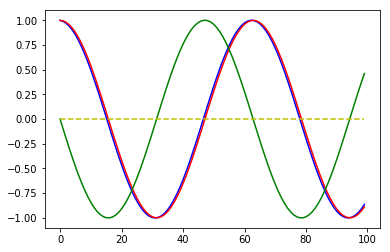

In [37]:
pyplot.plot(X, 'b-',Xanalytical,'r-') ##Plot the results
pyplot.plot(Px, 'g-') ##Plot the results
zeros = numpy.zeros(nPoints)
pyplot.plot(zeros,'y--')

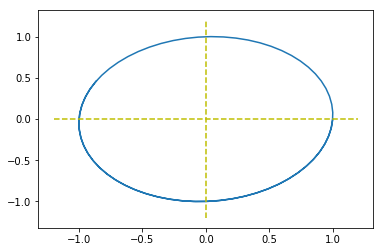

In [47]:
pyplot.plot(X,Px)
x = numpy.linspace(-1.20, 1.20, 100)
y = numpy.zeros(100)
pyplot.plot(x,y,'y--')
x = numpy.zeros(100)
y = numpy.linspace(-1.20,1.20,100)
pyplot.plot(x,y,'y--')